In [2]:
library(tidyverse)
library(reshape)

In [3]:
options(repr.plot.height = 3, repr.plot.width = 6)

- This notebook contains the visualization of the rating patterns among children (based on Dogo dataset) and adults (based on the Movie lens dataset).

### Dogo Movies

In [4]:
dogo_data = read_delim("data/input/Dogo-Movies/ratings.txt", delim = ",", col_names = c("user","item", "rating", "timestamp"))

Parsed with column specification:
cols(
  user = col_integer(),
  item = col_integer(),
  rating = col_integer(),
  timestamp = col_character()
)


In [5]:
dogo_data = dogo_data %>% mutate(user = 1000000 + user) %>% 
            select (user, item, rating)

In [6]:
head(dogo_data, 3)

user,item,rating
1000001,4886,5
1000002,586,4
1000002,1032,3


### ML1M

In [7]:
movie_lens_data = read_delim("data/input/ML1M/movie_lens_ratings.txt", delim = "::", col_names = c("user", "xa", "item", "xb", "rating", "xc", "timestamp"))

Parsed with column specification:
cols(
  user = col_integer(),
  xa = col_character(),
  item = col_integer(),
  xb = col_character(),
  rating = col_integer(),
  xc = col_character(),
  timestamp = col_integer()
)


In [8]:
movie_lens_data = movie_lens_data %>%
            select(user, item, rating)

In [9]:
head(movie_lens_data, 3)

user,item,rating
1,1193,5
1,661,3
1,914,3


In [10]:
movie_lens_data_dist = movie_lens_data %>% 
                group_by(user) %>%
                summarize(num_ratings = n())

In [11]:
head(movie_lens_data_dist, 3)

user,num_ratings
1,53
2,129
3,51


In [12]:
dogo_data_dist = dogo_data %>% 
                group_by(user) %>%
                summarize(num_ratings = n())

In [13]:
head(dogo_data_dist, 3)

user,num_ratings
1000001,1
1000002,54
1000003,9


In [14]:
dogo_data_dist$Dataset = "Dogo"
movie_lens_data_dist$Dataset = "ML1M"

In [15]:
ML1M_Dogo_data_dist = bind_rows(movie_lens_data_dist, dogo_data_dist)

In [16]:
head(ML1M_Dogo_data_dist, 3)

user,num_ratings,Dataset
1,53,ML1M
2,129,ML1M
3,51,ML1M


### Visualize rating distribution in Dogo and ML1M datasets

Warning message:
“Removed 140 rows containing non-finite values (stat_bin).”Warning message:
“Removed 3 rows containing missing values (geom_bar).”

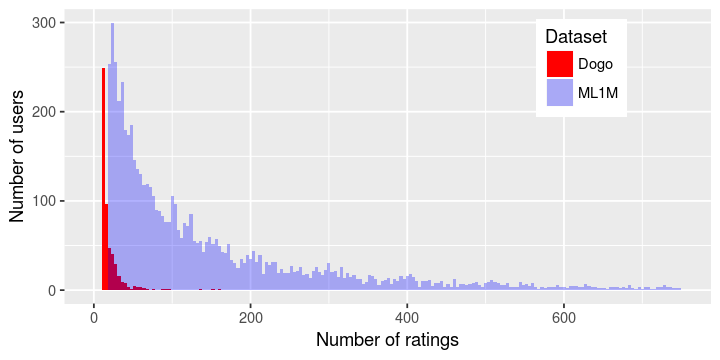

In [17]:
plot = ggplot(ML1M_Dogo_data_dist, aes(x = num_ratings, fill = Dataset)) + 
    geom_histogram(position="identity", binwidth = 4) + #+
    xlim(0, 750) +
    ylim(0, 300) +
    xlab("Number of ratings") +
    ylab("Number of users") +
    theme(legend.position = c(0.8, 0.8)) +
    scale_fill_manual(values = alpha(c("red", "blue"), c(1, .3)))
plot

<b>Figure 1 in main paper: User activity in Dogo and ML1M.</b>